0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Epoch 1/10000
127/127 [==============================] - 5s 9ms/step - loss: 0.0627 - mae: 0.2020 - mse: 0.0627 - val_loss: 0.0438 - val_mae: 0.1817 - val_mse: 0.0438 - lr: 0.0010
Epoch 2/10000
127/127 [==============================] - 1s 6ms/step - loss: 0.0466 - mae: 0.1832 - mse: 0.0466 - val_loss: 0.0501 - val_mae: 0.1910 - val_mse: 0.0501 - lr: 0.0010
Epoch 3/10000
127/127 [==============================] - 1s 7ms/step - loss: 0.0470 - mae: 0.1823 - mse: 0.0470 - val_loss: 0.0719 - val_mae: 0.2188 - val_mse: 0.0719 - lr: 0.0010
Epoch 4/10000
127/127 [==============================] - 1s 6ms/step - loss: 0.0454 - mae: 0.1806 - mse: 0.0454 - val_loss: 0.0581 - val_mae: 0.2014 - val_mse: 0.0581 - lr: 0.0010
Epoch 5/10000
127/127 [==============================] - 1s 6ms/step - loss: 0.0452 - mae: 0.1804 - mse: 0.0452 - val_loss: 0.0777 - val_mae: 0.2269 - val_mse: 0.0777 - lr: 0.0010
Epoch 6/10000
127/127 [==============================] - 1s 6ms/step - loss: 0.0463 - mae: 0.1806 - 

127/127 [==============================] - 1s 7ms/step - loss: 0.0415 - mae: 0.1725 - mse: 0.0415 - val_loss: 0.0575 - val_mae: 0.1982 - val_mse: 0.0575 - lr: 7.0000e-04
Epoch 46/10000
127/127 [==============================] - 1s 7ms/step - loss: 0.0417 - mae: 0.1728 - mse: 0.0417 - val_loss: 0.0610 - val_mae: 0.2021 - val_mse: 0.0610 - lr: 7.0000e-04
Epoch 47/10000
127/127 [==============================] - 1s 6ms/step - loss: 0.0410 - mae: 0.1716 - mse: 0.0410 - val_loss: 0.0652 - val_mae: 0.2080 - val_mse: 0.0652 - lr: 7.0000e-04
Epoch 48/10000
127/127 [==============================] - 1s 7ms/step - loss: 0.0417 - mae: 0.1725 - mse: 0.0417 - val_loss: 0.0608 - val_mae: 0.2017 - val_mse: 0.0608 - lr: 7.0000e-04
Epoch 49/10000
127/127 [==============================] - 1s 7ms/step - loss: 0.0414 - mae: 0.1724 - mse: 0.0414 - val_loss: 0.0583 - val_mae: 0.1979 - val_mse: 0.0583 - lr: 7.0000e-04
Epoch 50/10000
127/127 [==============================] - 1s 6ms/step - loss: 0.0418 - mae

C:\Users\SUJAN\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


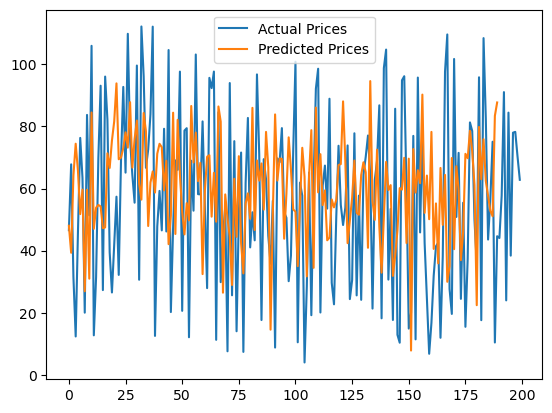

In [46]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tqdm.keras import TqdmCallback
# Load your stock price data (replace 'your_data.csv' with your actual file)
data = np.random.randint(50, 150, size=1000) + np.cumsum(np.random.normal(0, 1, size=1000))
data = pd.DataFrame(data, columns=['Close'])
# Define a function to prepare data for CNN
def prepare_data_cnn(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length])
        y.append(data[i + sequence_length])
    return np.array(X), np.array(y)

# Define a function to prepare data for SVR
def prepare_data_svr(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length].flatten())
        y.append(data[i + sequence_length])
    return np.array(X), np.array(y)

# Set sequence length and split the data into training and test sets
sequence_length = 10
train, test = train_test_split(data['Close'].values, test_size=0.2, shuffle=False)

# Scale the data
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train.reshape(-1, 1))
test_scaled = scaler.transform(test.reshape(-1, 1))

# Prepare data for CNN
X_train_cnn, y_train_cnn = prepare_data_cnn(train_scaled, sequence_length)
X_test_cnn, y_test_cnn = prepare_data_cnn(test_scaled, sequence_length)

# Build CNN model
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=64, kernel_size=1, activation='relu', input_shape=(sequence_length, 1)))
cnn_model.add(Conv1D(filters=64, kernel_size=1, activation='relu'))
cnn_model.add(Conv1D(filters=64, kernel_size=1, activation='relu'))
cnn_model.add(Conv1D(filters=64, kernel_size=1, activation='relu'))
cnn_model.add(Conv1D(filters=64, kernel_size=1, activation='relu'))
cnn_model.add(Conv1D(filters=64, kernel_size=1, activation='relu'))
cnn_model.add(Conv1D(filters=64, kernel_size=1, activation='relu'))
cnn_model.add(Conv1D(filters=64, kernel_size=1, activation='relu'))
cnn_model.add(Conv1D(filters=64, kernel_size=1, activation='relu'))
cnn_model.add(Conv1D(filters=64, kernel_size=1, activation='relu'))
cnn_model.add(Conv1D(filters=64, kernel_size=1, activation='relu'))
cnn_model.add(Conv1D(filters=64, kernel_size=1, activation='relu'))
cnn_model.add(Conv1D(filters=64, kernel_size=1, activation='relu'))
cnn_model.add(Flatten())
cnn_model.add(Dense(50, activation='relu'))
cnn_model.add(Dense(1))
cnn_model.compile(optimizer='adam', loss='mse')

# Train CNN model
cnn_model.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics=['mae', 'mse'])
lr_reduction = ReduceLROnPlateau(monitor='val_loss',patience=40, verbose=2, factor=0.7,min_delta = 1e-04, 
                             cooldown = 0,min_lr =1e-15)
callbacks = [EarlyStopping(monitor='val_loss', patience=75),lr_reduction,TqdmCallback(verbose=1) ]
cnn_model.fit(X_train_cnn, y_train_cnn, epochs =10000,validation_split=0.2, batch_size =5,callbacks=callbacks)

# Make predictions using the CNN model on test data
cnn_test_predictions = cnn_model.predict(X_test_cnn)

# Flatten the CNN test predictions for SVR input
cnn_test_predictions_flat = cnn_test_predictions.flatten()

# Prepare data for SVR
X_train_svr, y_train_svr = prepare_data_svr(train_scaled, sequence_length)
X_test_svr, y_test_svr = prepare_data_svr(test_scaled, sequence_length)

# Build SVR model
svr_model = SVR(kernel='rbf')

# Train the SVR model on CNN predictions
svr_model.fit(X_train_svr, y_train_svr)

# Make predictions using SVR model on CNN test predictions
final_predictions = svr_model.predict(X_test_svr)

# Inverse transform the scaled data to get actual values
actual_values = scaler.inverse_transform(test_scaled.reshape(-1, 1)).flatten()
final_predictions = scaler.inverse_transform(final_predictions.reshape(-1, 1)).flatten()

# Calculate and print the Mean Squared Error (MSE) as an evaluation metric
mse = mean_squared_error(actual_values[:190].ravel(), final_predictions.ravel())# 10 sequence length 
print(f'Mean Squared Error (MSE): {mse}')

# Plotting (you can use your preferred plotting library)
import matplotlib.pyplot as plt

plt.plot(actual_values.ravel(), label='Actual Prices')
plt.plot(final_predictions.ravel(), label='Predicted Prices')
plt.legend()
plt.show()

In [47]:
actual_values

array([ 46.58969148,  67.78901374,  31.49314337,  12.35086871,
        45.99674748,  76.30278076,  63.36654655,  20.01715151,
        83.71055698,  51.37446731, 105.96045149,  12.71743936,
        31.42809803,  69.76276223,  93.1116327 ,  27.28656594,
        96.05744815,  82.23150419,  39.44291848,  26.51971506,
        42.18501359,  57.37147102,  32.18168427,  69.19999356,
        92.72614238,  65.120474  , 109.83298983,  75.80076869,
        64.4244619 ,  55.44004648,  99.61092001,  30.62317544,
       112.19202037,  96.18949371,  66.68033533,  72.5541732 ,
        83.97394084, 112.13727206,  12.53337841,  47.7990579 ,
        59.23392653,  46.52110758,  79.24714637,  46.17022325,
       104.60772155,  20.21713924,  47.53475465,  69.04901518,
        66.02093388,  97.65707073,  20.60510755,  78.6587963 ,
        79.43464025,  12.10028843,  68.96582577,  52.86509151,
       103.16766184,  58.18066661,  58.13739342,  81.61899144,
        54.04426207,  27.92571111,  95.64419085,  92.33

In [48]:
final_predictions

array([48.02034814, 39.30998304, 64.26283844, 74.43446719, 65.70379892,
       51.76274398, 59.65097312, 26.90816929, 59.59859324, 30.96760269,
       84.49159121, 47.03079157, 53.83153558, 54.70713405, 54.2442302 ,
       47.2128491 , 47.48569167, 71.33792562, 66.62937975, 75.46653681,
       81.6367297 , 93.8633394 , 69.4310977 , 69.97634322, 73.02625741,
       78.0974986 , 73.16935039, 87.79825059, 66.73439112, 75.97517891,
       81.88796139, 61.5375533 , 56.42544232, 84.32810753, 78.46481681,
       47.92913764, 61.96303748, 65.49743613, 58.69535586, 71.21782186,
       74.40747283, 73.29578998, 59.40767687, 68.96401165, 42.08044373,
       51.33733727, 84.42765883, 45.36165189, 82.12998926, 64.55128475,
       52.52428771, 45.22223692, 55.29532138, 49.74830387, 86.58166704,
       68.39376312, 78.02809281, 62.38618041, 68.26237555, 32.43569272,
       59.18220896, 70.23964851, 70.71819271, 50.93906356, 65.05639494,
       49.32217308, 86.42600747, 81.54648044, 26.45065365, 58.10